In [25]:
# Using Keras to create a 10 neurons and single layer NN
# Against the MNIST databesa

from keras.datasets import mnist
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
import numpy as np
import matplotlib.pyplot as plt

In [26]:
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger
nb_classes = 10

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)


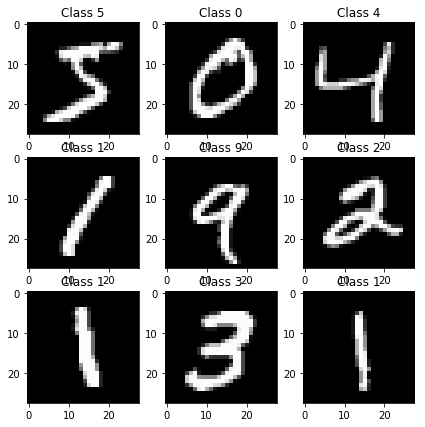

In [27]:
# Show some images
def show(X_train, y_train):
	for i in range(9):
	    plt.subplot(3,3,i+1)
	    plt.imshow(X_train[i], cmap='gray', interpolation='none')
	    plt.title("Class {}".format(y_train[i]))
	plt.show()

show(X_train, y_train)

In [28]:
# Reshape arrays
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [5]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu')) # An "activation" is just a non-linear function applied to the output
                              # of the layer above. Here, with a "rectified linear unit",
                              # we clamp all values below 0 to 0.
                           
model.add(Dropout(0.2))   # Dropout helps protect the model from memorizing or "overfitting" the training data
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax')) # This special "softmax" activation among other things,
                                 # ensures the output is a valid probaility distribution, that is
                                 # that its values are all non-negative and sum to 1.

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [17]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=4, verbose=1,
          validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 10s - loss: 0.0205 - acc: 0.9927 - val_loss: 0.0726 - val_acc: 0.9832
Epoch 2/4
60000/60000 [==============================] - 11s - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0804 - val_acc: 0.9820
Epoch 3/4
60000/60000 [==============================] - 11s - loss: 0.0192 - acc: 0.9935 - val_loss: 0.0704 - val_acc: 0.9830
Epoch 4/4
60000/60000 [==============================] - 11s - loss: 0.0179 - acc: 0.9942 - val_loss: 0.0803 - val_acc: 0.9815


In [11]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.0624838683163
Test accuracy: 0.9803


In [12]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

 9312/10000 [==========================>...] - ETA: 0s

In [13]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

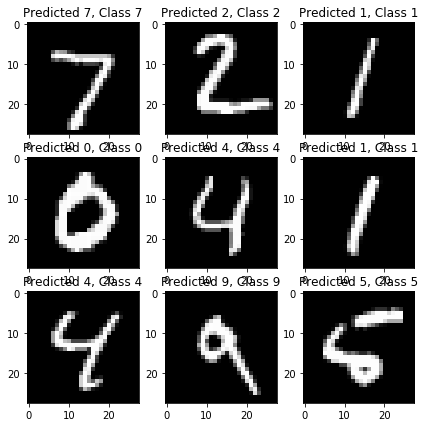

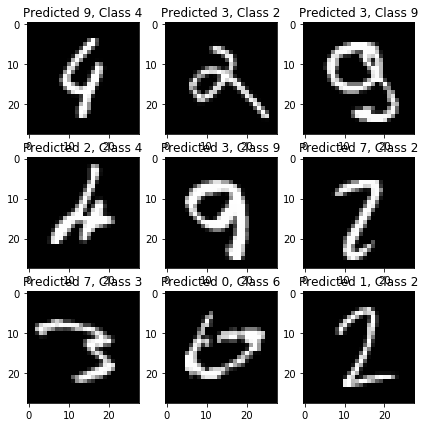

In [14]:
plt.show()